## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [17]:
from sklearn.datasets import load_boston
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [3]:
data =  load_boston()

In [8]:
# print(data)
X, y = data['data'], data['target']
#print(X)
#print(y)

In [11]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [12]:
y[0]

24.0

In [13]:
len(y)

506

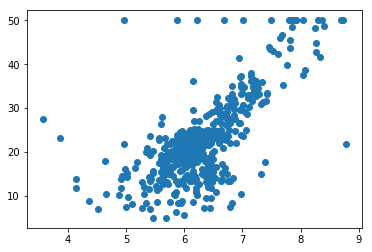

In [23]:
plt.scatter(X[:,5],y)

In [19]:
def price(rm, k, b):
    return rm*k + b

## 1. Random Choose Method to get optimal k* and *b

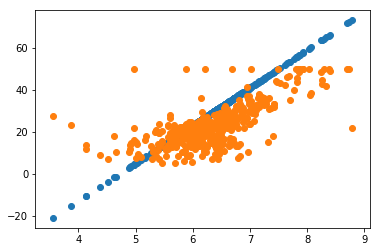

In [35]:
X_rm = X[:,5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
plt.scatter(X_rm, price_by_random_k_and_b)
plt.scatter(X[:,5],y)

In [38]:
print(f"price = {k}*rm + ({b})")

price = 18*rm + (-85)


In [43]:
def loss(y, y_hat):
    return sum((y_i -y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat)))/len(y)
    

In [44]:
loss(y,price_by_random_k_and_b)

113.86339610276691

## 2.Supervised Direction to get optimal k* and *b

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: The world is complicate and dynamic, it seems difficult to consider all the details of a thing and machine learning can deal with it in a very different way and automately achive the best solution.

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485


> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

In [48]:
import requests
import re
from selenium import webdriver
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
driver = webdriver.Chrome()

In [3]:
driver.get("https://map.bjsubway.com/")

In [5]:
map_beijing = driver.page_source
print(map_beijing)

<html lang="en"><head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">
        <meta name="viewport" content="user-scalable=no, width=device-width, initial-scale=1, maximum-scale=1">
        <meta name="csrf-token" content="Ty2bF9trihB4n5BAwLlZj4AqNAqeOLybTFRyo2Ws">

        <title>北京地铁</title>

        <!-- Meta -->
        
        <link rel="stylesheet" href="https://map.bjsubway.com/css/app.css" type="text/css" media="all">
        <!-- Styles -->
        
        <!-- Check if the language is set to RTL, so apply the RTL layouts -->
        <!-- Otherwise apply the normal LTR layouts -->
        <style type="text/css">
    body {
        overflow: hidden;
        font-family: '黑体';
    }

    .tt-menu {
      width: 296px;
      margin: 12px 0px;
      margin-left: -20px;
      padding: 8px 0;
      background-color: #fff;
      border: 1px solid #ccc;
      border: 1px solid rgba(0, 0, 0, 0.2);
      overflow-y: auto;
    }

    .tt-su

In [9]:
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [10]:
station = r'<circle id="SvgjsCircle\d+" r="4" cx="(\d+)" cy="(\d+)" fill="white" stroke="black" stroke-width="1" sdata="(\w+)"></circle>'
# turn_station = r'<image id="SvgjsImage1611" xlink:href="https://map.bjsubway.com/subwaymap/turn.png" width="14" height="14" x="621" y="817" sdata="北京西站"></image>'

In [13]:
pattern = re.compile(station)
stations = pattern.findall(map_beijing)
print(stations)

[('280', '760', '苹果园'), ('310', '790', '古城'), ('363', '790', '八角游乐园'), ('407', '790', '八宝山'), ('448', '790', '玉泉路'), ('488', '790', '五棵松'), ('533', '790', '万寿路'), ('688', '790', '木樨地'), ('733', '790', '南礼士路'), ('922', '790', '天安门西'), ('979', '790', '天安门东'), ('1034', '790', '王府井'), ('1184', '790', '永安里'), ('851', '632', '积水潭'), ('1007', '632', '安定门'), ('1134', '698', '东四十条'), ('1128', '836', '北京站'), ('951', '841', '前门'), ('904', '841', '和平门'), ('787', '833', '长椿街'), ('783', '750', '阜成门'), ('457', '410', '安河桥北'), ('516', '410', '北宫门'), ('628', '438', '圆明园'), ('628', '472', '北京大学东门'), ('628', '500', '中关村'), ('628', '587', '人民大学'), ('628', '626', '魏公村'), ('710', '660', '动物园'), ('848', '660', '新街口'), ('862', '738', '西四'), ('862', '760', '灵境胡同'), ('862', '896', '陶然亭'), ('862', '950', '马家堡'), ('862', '1005', '公益西桥'), ('848', '1023', '新宫'), ('833', '1040', '西红门'), ('833', '1060', '高米店北'), ('833', '1082', '高米店南'), ('833', '1101', '枣园'), ('833', '1120', '清源路'), ('833', '1142', '黄村西大街'), ('833', 

In [51]:
stations = np.array(stations)
print(stations)

[['280' '760' '苹果园']
 ['310' '790' '古城']
 ['363' '790' '八角游乐园']
 ['407' '790' '八宝山']
 ['448' '790' '玉泉路']
 ['488' '790' '五棵松']
 ['533' '790' '万寿路']
 ['688' '790' '木樨地']
 ['733' '790' '南礼士路']
 ['922' '790' '天安门西']
 ['979' '790' '天安门东']
 ['1034' '790' '王府井']
 ['1184' '790' '永安里']
 ['851' '632' '积水潭']
 ['1007' '632' '安定门']
 ['1134' '698' '东四十条']
 ['1128' '836' '北京站']
 ['951' '841' '前门']
 ['904' '841' '和平门']
 ['787' '833' '长椿街']
 ['783' '750' '阜成门']
 ['457' '410' '安河桥北']
 ['516' '410' '北宫门']
 ['628' '438' '圆明园']
 ['628' '472' '北京大学东门']
 ['628' '500' '中关村']
 ['628' '587' '人民大学']
 ['628' '626' '魏公村']
 ['710' '660' '动物园']
 ['848' '660' '新街口']
 ['862' '738' '西四']
 ['862' '760' '灵境胡同']
 ['862' '896' '陶然亭']
 ['862' '950' '马家堡']
 ['862' '1005' '公益西桥']
 ['848' '1023' '新宫']
 ['833' '1040' '西红门']
 ['833' '1060' '高米店北']
 ['833' '1082' '高米店南']
 ['833' '1101' '枣园']
 ['833' '1120' '清源路']
 ['833' '1142' '黄村西大街']
 ['833' '1163' '黄村火车站']
 ['833' '1187' '义和庄']
 ['833' '1206' '生物医药基地']
 ['833' '1229' '天宫院']


<class 'numpy.ndarray'>


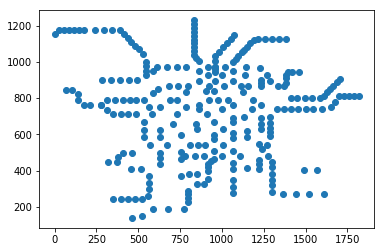

In [78]:
position = np.array([[int(x), int(y)] for x, y, z in stations])
#plt.scatter(int(stations[:,0]), int(stations[:,1]))
print(type(position))
#print(position[:,0])
plt.scatter(position[:,0], position[:,1])

In [47]:
stations_list[:,0]

TypeError: list indices must be integers or slices, not tuple

In [12]:
pattern = re.compile(what_we_want)

In [17]:
likes = pattern.findall(response.text)

In [18]:
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page
movie.douban.com/subject/3168101/?from=subject-page


##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)